<a href="https://colab.research.google.com/github/itsTIMUS/colab-projects/blob/main/ML/WinePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# loading the dataset into pandas dataframe
wine_dataset = pd.read_csv('/content/winequality-red.csv')

In [ ]:
wine_dataset.shape

(1599, 12)

In [ ]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_dataset.isnull().sum()

In [ ]:
#data analysis and visuallization
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


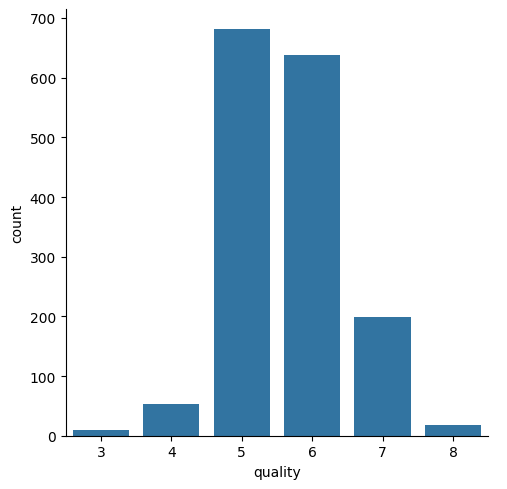

In [ ]:
# number of values for each quality
sns.catplot(x='quality',data=wine_dataset,kind='count')

In [ ]:
# volatile acidty vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity', data=wine_dataset)

In [ ]:
# citric acid vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid', data=wine_dataset)

In [ ]:
# correlation
correlation=wine_dataset.corr()

In [ ]:
# contructing a heatmap to understand the correlation between the colums
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f', annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
#data preprocessing
x= wine_dataset.drop(['quality'],axis=1)

In [ ]:
print(x)

In [ ]:
#label binarization
y= wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [ ]:
print(y)

In [ ]:
#splitting the data fraam into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [ ]:
print("x:", x.shape)
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x: (1599, 11)
x_train: (1279, 11)
x_test: (320, 11)
y_train: (1279,)
y_test: (320,)


In [ ]:
#model traing (laoding the model)
model = RandomForestClassifier()

In [ ]:
#traing the model with x_train
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#preiction on the training data
#accuracy for prediction o training data
test_data_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test,test_data_prediction)
print("accuracy ", test_data_accuracy)


accuracy  0.915625


In [ ]:
#building a predictive system
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
#changing data into numpy arrays
input_data_np = np.asarray(input_data)
# reshape it for one instance
input_data_reshape = input_data_np.reshape(1,-1)
prediction = model.predict(input_data_reshape)
print(prediction)

if(prediction[0]==1):
  print("Good wine")
else:
  print("bad wine")

[1]
Good wine


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
